<a href="https://colab.research.google.com/github/shahdmkz20/task3/blob/main/task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd

try:
    df_original = pd.read_csv('General_Education_School.csv')
    df = df_original.copy()
    df = df.iloc[1:].reset_index(drop=True)
    print(df.head())
except FileNotFoundError:
    print("Error: 'General_Education_School.csv' not found. Please check the file path.")
except Exception as e:
    print(f"An error occurred: {e}")


      DBN                     School Name               School Type  \
0  01M015       P.S. 015 Roberto Clemente         Elementary School   
1  01M019             P.S. 019 Asher Levy         Elementary School   
2  01M020            P.S. 020 Anna Silver         Elementary School   
3  01M034  P.S. 034 Franklin D. Roosevelt  Elementary/Middle School   
4  01M063       P.S. 063 William Mckinley         Elementary School   

  Parent Response Rate Teacher Response Rate Student Response Rate  \
0                  61%                   92%                   NaN   
1                  92%                   94%                   NaN   
2                  88%                   73%                   NaN   
3                  39%                   58%                   96%   
4                  58%                  100%                   NaN   

  Total Safety and Respect Score Total Communication Score  \
0                            8.4                       8.2   
1                           

In [ ]:
cols = ["Parent Response Rate", "Teacher Response Rate", "Student Response Rate"]

for col in cols:
    df[col] = df[col].astype(str)
    df[col] = df[col].str.replace('%', '', regex=False)
    df[col] = pd.to_numeric(df[col], errors='coerce')
print(df[cols].describe())


       Parent Response Rate  Teacher Response Rate  Student Response Rate
count           1670.000000            1670.000000             995.000000
mean              56.365269              83.410180              84.544724
std               25.009922              17.428378              16.129966
min                1.000000               0.000000               0.000000
25%               37.000000              75.000000              79.000000
50%               57.000000              88.000000              90.000000
75%               76.000000              97.000000              96.000000
max              100.000000             100.000000             100.000000


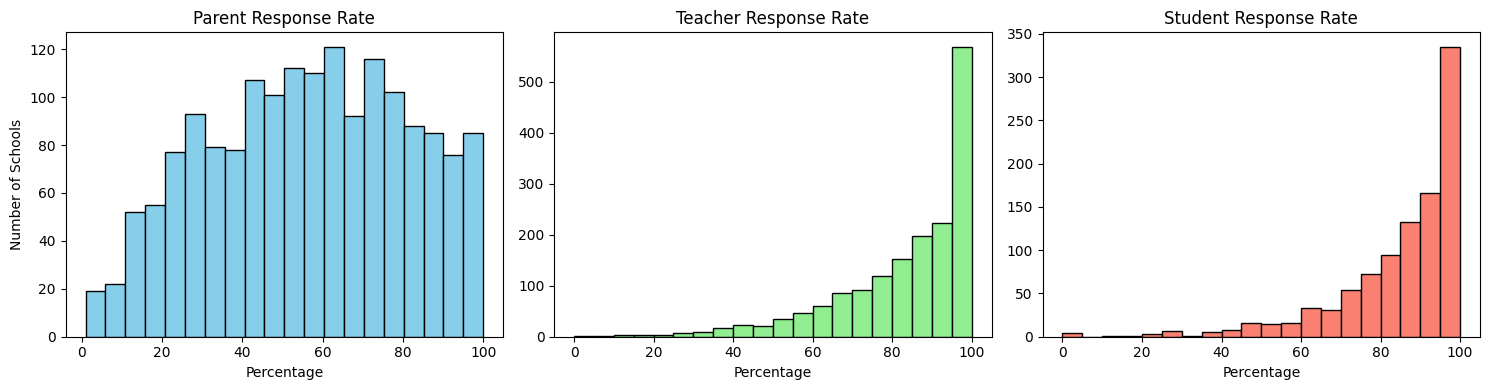

In [ ]:
import matplotlib.pyplot as plt

# حجم الشكل الكامل
plt.figure(figsize=(15, 4))

# Parent Response Rate
plt.subplot(1, 3, 1)
plt.hist(df["Parent Response Rate"].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title("Parent Response Rate")
plt.xlabel("Percentage")
plt.ylabel("Number of Schools")

# Teacher Response Rate
plt.subplot(1, 3, 2)
plt.hist(df["Teacher Response Rate"].dropna(), bins=20, color='lightgreen', edgecolor='black')
plt.title("Teacher Response Rate")
plt.xlabel("Percentage")

# Student Response Rate
plt.subplot(1, 3, 3)
plt.hist(df["Student Response Rate"].dropna(), bins=20, color='salmon', edgecolor='black')
plt.title("Student Response Rate")
plt.xlabel("Percentage")

# عرض المخططات
plt.tight_layout()
plt.show()


In [ ]:
num_schools = df["School Name"].nunique()
print(f"عدد المدارس المشاركة: {num_schools}")


عدد المدارس المشاركة: 1665


In [ ]:
school_types = df["School Type"].value_counts()
print("أنواع المدارس وعددها:\n", school_types)


أنواع المدارس وعددها:
 School Type
Elementary School                617
High School                      352
Middle School                    293
Elementary/Middle School         160
Middle/High School                87
Early Childhood School            83
Transfer High School              49
YABC                              22
Elementary/Middle/High School      7
Name: count, dtype: int64


In [3]:

# حذف الصف الأول (إذا كان مكرر للعناوين)
df = df.iloc[1:].reset_index(drop=True)

# تعريف أعمدة النسب المئوية
percent_cols = ["Parent Response Rate", "Teacher Response Rate", "Student Response Rate"]


# تعريف أعمدة التقييم
score_cols = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

# تحويل أعمدة التقييم إلى أرقام
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')


# طباعة عدد القيم الفارغة بعد التنظيف
print("عدد القيم الفارغة بعد التنظيف:")
print(df.isnull().sum())

# عرض أول 5 صفوف من البيانات النظيفة
print("\nأول 5 صفوف من البيانات النظيفة:")
print(df.head())


عدد القيم الفارغة بعد التنظيف:
DBN                                    0
School Name                            0
School Type                            0
Parent Response Rate                   0
Teacher Response Rate                  0
Student Response Rate                674
Total Safety and Respect Score         0
Total Communication Score              0
Total Engagement Score                 0
Total Academic Expectations Score      0
dtype: int64

أول 5 صفوف من البيانات النظيفة:
      DBN                     School Name               School Type  \
0  01M019             P.S. 019 Asher Levy         Elementary School   
1  01M020            P.S. 020 Anna Silver         Elementary School   
2  01M034  P.S. 034 Franklin D. Roosevelt  Elementary/Middle School   
3  01M063       P.S. 063 William Mckinley         Elementary School   
4  01M064           P.S. 064 Robert Simon         Elementary School   

  Parent Response Rate Teacher Response Rate Student Response Rate  \
0               

In [ ]:
missing_count = df["Student Response Rate"].isnull().sum()
total_rows = len(df)
missing_percent = (missing_count / total_rows) * 100
print(f"عدد القيم الناقصة: {missing_count} من {total_rows} ({missing_percent:.2f}%)")


عدد القيم الناقصة: 675 من 1670 (40.42%)


In [ ]:
# فلترة المدارس التي لا تحتوي على استجابة الطلاب
missing_students = df[df["Student Response Rate"].isnull()]

# عرض أنواع المدارس وتكرار كل نوع
school_types_missing = missing_students["School Type"].value_counts()

print("عدد المدارس التي لا تحتوي على استجابة طلاب حسب النوع:")
print(school_types_missing)


عدد المدارس التي لا تحتوي على استجابة طلاب حسب النوع:
School Type
Elementary School         589
Early Childhood School     83
Middle School               3
Name: count, dtype: int64


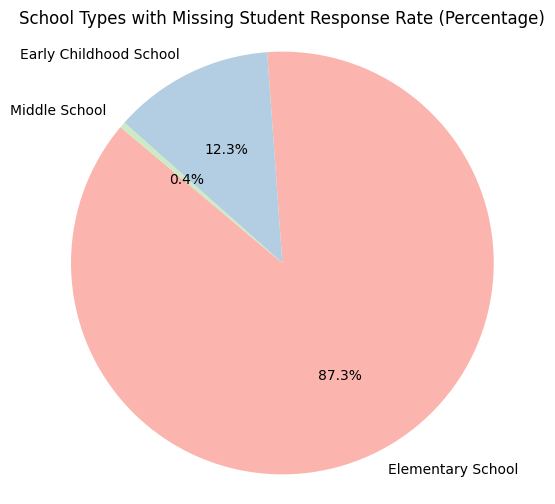

In [ ]:
import matplotlib.pyplot as plt

# فلترة المدارس التي تفتقد استجابة الطلاب
missing_students = df[df["Student Response Rate"].isnull()]

# حساب النسبة المئوية لكل نوع مدرسة داخل البيانات الناقصة
school_type_percent = (
    missing_students["School Type"]
    .value_counts(normalize=True) * 100  # تحويل إلى نسبة مئوية
)

# رسم بياني دائري (Pie Chart)
plt.figure(figsize=(6, 6))
plt.pie(school_type_percent, labels=school_type_percent.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("School Types with Missing Student Response Rate (Percentage)")
plt.axis('equal')  # لتكون الدائرة دائرية تمامًا
plt.show()


In [ ]:
# 1. عدد كل المدارس الابتدائية
total_elem = df[df["School Type"].str.contains("Elementary", case=False)]
total_elem_count = total_elem.shape[0]

# 2. عدد المدارس الابتدائية التي لا تحتوي على استجابة طلاب
missing_elem = total_elem[total_elem["Student Response Rate"].isnull()]
missing_elem_count = missing_elem.shape[0]

# 3. النسبة المئوية
percent_missing = (missing_elem_count / total_elem_count) * 100

# 4. عرض النتائج
print(f"📊 إجمالي عدد المدارس الابتدائية: {total_elem_count}")
print(f"❌ عدد المدارس الابتدائية التي تفتقد استجابة الطلاب: {missing_elem_count}")
print(f"📉 النسبة المئوية لعدم الاستجابة بين الابتدائي: {percent_missing:.2f}%")


📊 إجمالي عدد المدارس الابتدائية: 784
❌ عدد المدارس الابتدائية التي تفتقد استجابة الطلاب: 589
📉 النسبة المئوية لعدم الاستجابة بين الابتدائي: 75.13%


<Figure size 1000x600 with 0 Axes>

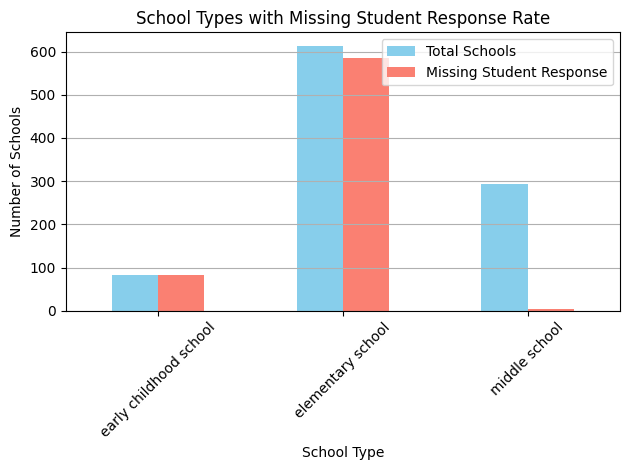

🔍 فقط أنواع المدارس التي لديها نقص في استجابة الطلاب:
                        Missing %
School Type                      
early childhood school     100.00
elementary school           95.44
middle school                1.02


In [ ]:


# توحيد النصوص في عمود النوع
df["School Type"] = df["School Type"].str.lower()

# إجمالي المدارس حسب النوع
total_counts = df["School Type"].value_counts()

# المدارس التي تفتقد استجابة الطلاب
missing_counts = df[df["Student Response Rate"].isnull()]["School Type"].value_counts()

# دمج البيانات في DataFrame
comparison_df = pd.DataFrame({
    "Total Schools": total_counts,
    "Missing Student Response": missing_counts
}).fillna(0)

# تحويل إلى int
comparison_df = comparison_df.astype(int)

# فقط الأنواع التي فيها على الأقل مدرسة واحدة بدون استجابة طلاب
comparison_df = comparison_df[comparison_df["Missing Student Response"] > 0]

# إضافة النسبة المئوية
comparison_df["Missing %"] = (comparison_df["Missing Student Response"] / comparison_df["Total Schools"]) * 100

# رسم بياني
plt.figure(figsize=(10, 6))
comparison_df[["Total Schools", "Missing Student Response"]].plot(kind="bar", color=["skyblue", "salmon"])
plt.title("School Types with Missing Student Response Rate")
plt.xlabel("School Type")
plt.ylabel("Number of Schools")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# عرض الجدول بالنسب المئوية
print("🔍 فقط أنواع المدارس التي لديها نقص في استجابة الطلاب:")
print(comparison_df[["Missing %"]].round(2))


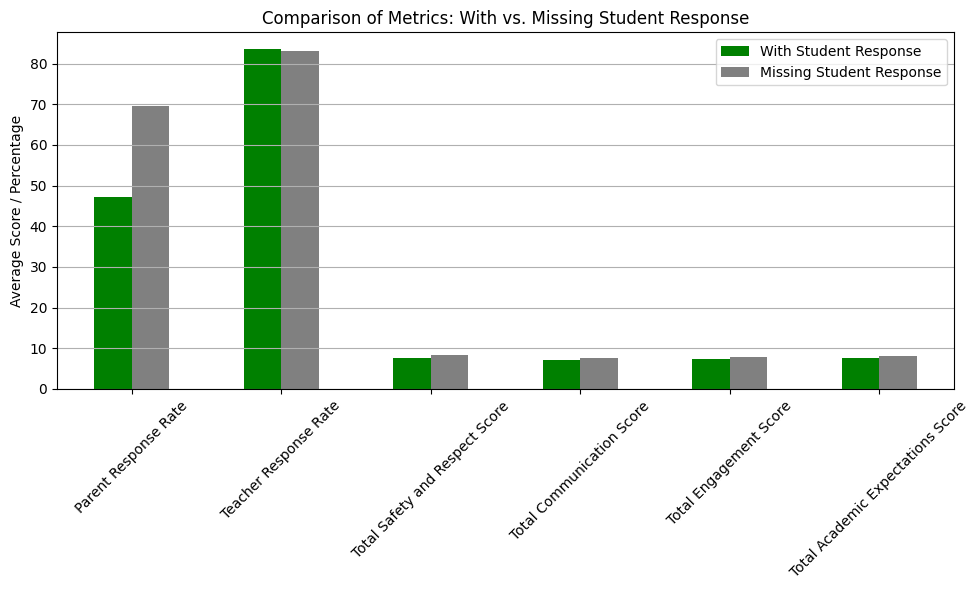

In [ ]:
cols_to_analyze = [
    "Parent Response Rate",
    "Teacher Response Rate",
    "Total Safety and Respect Score",
    "Total Communication Score",
    "Total Engagement Score",
    "Total Academic Expectations Score"
]
# إنشاء عمود جديد يوضح هل استجابة الطلاب مفقودة أم لا
df["Student_Response_Missing"] = df["Student Response Rate"].isnull()

# حساب المتوسطات لكل مجموعة
comparison = df.groupby("Student_Response_Missing")[cols_to_analyze].mean().T
comparison.columns = ["With Student Response", "Missing Student Response"]
comparison["Diff"] = comparison["With Student Response"] - comparison["Missing Student Response"]

# عرض الجدول
# print("📊 مقارنة المتوسطات بين المدارس التي تحتوي/تفتقد استجابة طلاب:\n")
# print(comparison.round(2))

# رسم بياني للمقارنة

comparison[["With Student Response", "Missing Student Response"]].plot(kind='bar', figsize=(10, 6), color=["green", "gray"])
plt.title("Comparison of Metrics: With vs. Missing Student Response")
plt.ylabel("Average Score / Percentage")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


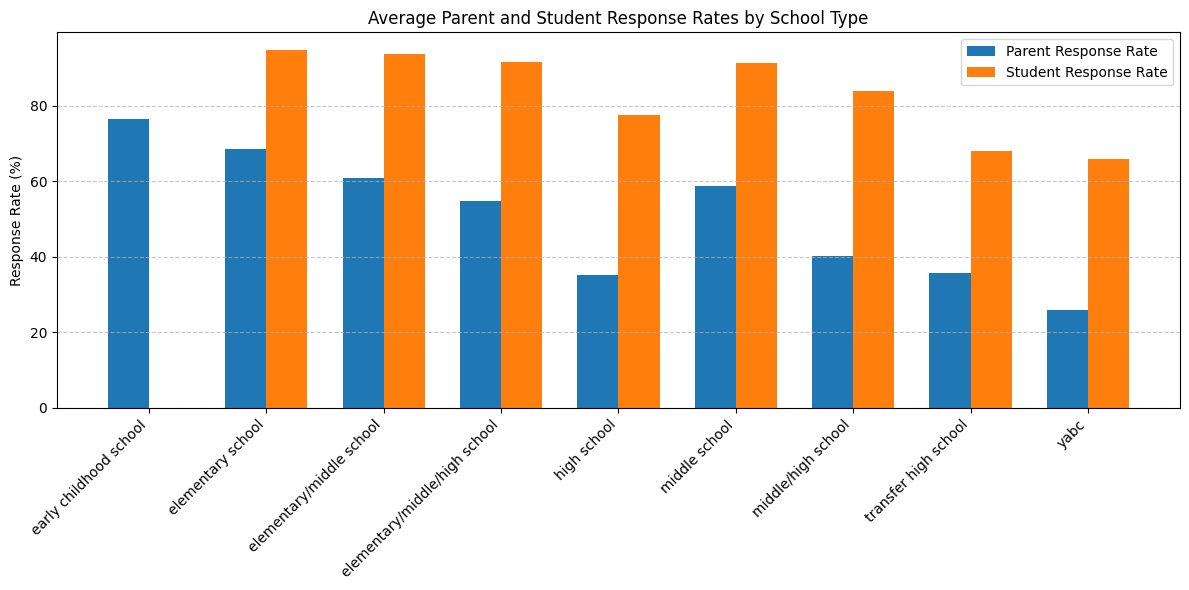

In [ ]:

# إزالة الصفوف اللي فيها نقص في نوع المدرسة أو النسب
#df_clean = df.dropna(subset=['School Type', 'Parent Response Rate', 'Student Response Rate'])

# تجميع البيانات حسب نوع المدرسة وأخذ المتوسط
grouped = df.groupby('School Type')[['Parent Response Rate', 'Student Response Rate']].mean().reset_index()

# رسم الأعمدة المجمعة
x = grouped['School Type']
x_indices = range(len(x))

width = 0.35  # عرض العمود

plt.figure(figsize=(12, 6))
plt.bar([i - width/2 for i in x_indices], grouped['Parent Response Rate'], width=width, label='Parent Response Rate')
plt.bar([i + width/2 for i in x_indices], grouped['Student Response Rate'], width=width, label='Student Response Rate')

# تخصيص الرسم
plt.xticks(x_indices, x, rotation=45, ha='right')
plt.ylabel('Response Rate (%)')
plt.title('Average Parent and Student Response Rates by School Type')
plt.legend()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# هي الرسمة دخلتني بالحيط


In [ ]:

# حساب معامل الارتباط
corr_safety = df['Parent Response Rate'].corr(df['Total Safety and Respect Score'])
corr_communication = df['Parent Response Rate'].corr(df['Total Communication Score'])

print(f"معامل الارتباط بين نسبة استجابة الأهل ودرجة الأمان: {corr_safety:.2f}")
print(f"معامل الارتباط بين نسبة استجابة الأهل ودرجة التواصل: {corr_communication:.2f}")


معامل الارتباط بين نسبة استجابة الأهل ودرجة الأمان: 0.50
معامل الارتباط بين نسبة استجابة الأهل ودرجة التواصل: 0.48


📊 متوسط نسبة استجابة الأهل:
✅ في المدارس التي لديها استجابة طلاب: 47.30%
❌ في المدارس التي لا يوجد فيها استجابة طلاب: 69.68%


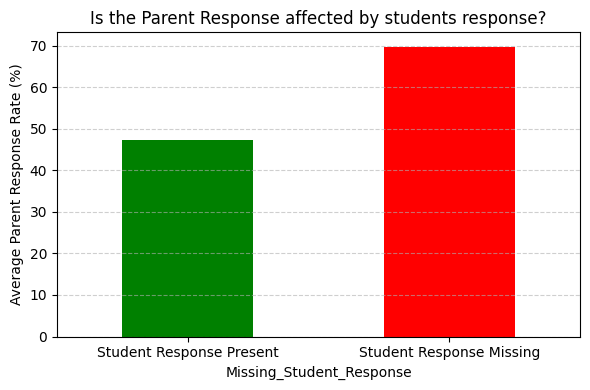

In [ ]:


df['Missing_Student_Response'] = df['Student Response Rate'].isnull()

# حساب متوسط استجابة الأهل حسب وجود أو غياب استجابة الطلاب
avg_response = df.groupby('Missing_Student_Response')['Parent Response Rate'].mean()

# عرض النتائج
print("📊 متوسط نسبة استجابة الأهل:")
print(f"✅ في المدارس التي لديها استجابة طلاب: {avg_response[False]:.2f}%")
print(f"❌ في المدارس التي لا يوجد فيها استجابة طلاب: {avg_response[True]:.2f}%")

# رسم بياني
avg_response.plot(kind='bar', color=['green', 'red'], figsize=(6,4))
plt.xticks(ticks=[0, 1], labels=["Student Response Present", "Student Response Missing"], rotation=0)
plt.ylabel("Average Parent Response Rate (%)")
plt.title("Is the Parent Response affected by students response?")

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:

# حساب متوسط التقييمات لكل نوع مدرسة
grouped_scores = df.groupby('School Type')[[
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]].mean().round(2)

# حساب المتوسط العام من الأربع تقييمات
grouped_scores['Overall Average'] = grouped_scores.mean(axis=1).round(2)

# ترتيب الأنواع من الأعلى إلى الأقل
grouped_sorted = grouped_scores.sort_values(by='Overall Average', ascending=False)

# عرض النتيجة
print("🎓 أنواع المدارس حسب متوسط التقييمات:")
print(grouped_sorted)



🎓 أنواع المدارس حسب متوسط التقييمات:
                               Total Safety and Respect Score  \
School Type                                                     
early childhood school                                   8.62   
yabc                                                     8.38   
elementary school                                        8.27   
transfer high school                                     8.09   
elementary/middle school                                 7.66   
middle school                                            7.46   
elementary/middle/high school                            7.47   
high school                                              7.39   
middle/high school                                       7.40   

                               Total Communication Score  \
School Type                                                
early childhood school                              8.00   
yabc                                                7.70   
element

In [8]:

# الأعمدة التي سنبحث فيها عن القيم المتطرفة
score_cols = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

# تحويل القيم النصية لأرقام
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# حساب المتوسط والانحراف المعياري وتحديد القيم المتطرفة
outliers = pd.DataFrame()
for col in score_cols:
    mean = df[col].mean()
    std = df[col].std()
    high = mean + 1.5 * std
    low = mean - 1.5 * std

    high_out = df[df[col] > high]
    low_out = df[df[col] < low]

    high_out = high_out.assign(Extreme=col + ' (High)')
    low_out = low_out.assign(Extreme=col + ' (Low)')

    outliers = pd.concat([outliers, high_out, low_out])

# إزالة التكرارات
outliers = outliers.drop_duplicates(subset='DBN')

# عرض النتائج
print("عدد المدارس ذات القيم المتطرفة:", len(outliers))
print(outliers[[ 'School Name', 'Extreme'] + score_cols])


عدد المدارس ذات القيم المتطرفة: 363
                                            School Name  \
20                                         Earth School   
42                  P.S. 059 Beekman Hill International   
51                            P.S. 130 Hernando De Soto   
54                           Yorkville Community School   
59                                P.S. 212 Midtown West   
...                                                 ...   
984                              P.S. 200 Benson School   
987                                    P.S. 205 Clarion   
1105  General D. Chappie James Elementary School Of ...   
1394                       P.S. 017 Henry David Thoreau   
1430                 Information Technology High School   

                                      Extreme  Total Safety and Respect Score  \
20      Total Safety and Respect Score (High)                             9.0   
42      Total Safety and Respect Score (High)                             9.1   
51      Tota

In [9]:

score_cols = [
    'Total Safety and Respect Score',
    'Total Communication Score',
    'Total Engagement Score',
    'Total Academic Expectations Score'
]

for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# تحليل القيم المتطرفة لكل مؤشر على حدة
for col in score_cols:
    mean = df[col].mean()
    std = df[col].std()
    high = mean + 1.5 * std
    low = mean - 1.5 * std

    high_outliers = df[df[col] > high]
    low_outliers = df[df[col] < low]

    print(f"\n📊 المؤشر: {col}")
    print(f"- عدد المدارس ذات القيم العالية جداً (> {high:.2f}): {len(high_outliers)}")
    print(f"- عدد المدارس ذات القيم المنخفضة جداً (< {low:.2f}): {len(low_outliers)}")



📊 المؤشر: Total Safety and Respect Score
- عدد المدارس ذات القيم العالية جداً (> 8.97): 95
- عدد المدارس ذات القيم المنخفضة جداً (< 6.73): 136

📊 المؤشر: Total Communication Score
- عدد المدارس ذات القيم العالية جداً (> 8.35): 121
- عدد المدارس ذات القيم المنخفضة جداً (< 6.25): 100

📊 المؤشر: Total Engagement Score
- عدد المدارس ذات القيم العالية جداً (> 8.58): 123
- عدد المدارس ذات القيم المنخفضة جداً (< 6.59): 92

📊 المؤشر: Total Academic Expectations Score
- عدد المدارس ذات القيم العالية جداً (> 8.82): 94
- عدد المدارس ذات القيم المنخفضة جداً (< 6.94): 122


In [12]:
score_col = 'Total Safety and Respect Score'


# حساب المتوسط والانحراف المعياري
mean = df[score_col].mean()
std = df[score_col].std()

# تحديد عتبة القيم المنخفضة (أكثر من 1.5 انحراف معياري تحت المتوسط)
low_threshold = mean - 1.5 * std

# استخراج المدارس التي قيمتها أقل من العتبة
low_values = df[df[score_col] < low_threshold]

print(f"عدد المدارس ذات {score_col} منخفضة جدًا (أقل من {low_threshold:.2f}): {len(low_values)}")
print(low_values[['DBN', 'School Name', score_col]])


عدد المدارس ذات Total Safety and Respect Score منخفضة جدًا (أقل من 6.73): 136
         DBN                                        School Name  \
17    01M345  Collaborative Academy Of Science, Technology, ...   
25    01M509                            Marta Valle High School   
118   02M520   Murry Bergtraum High School For Business Careers   
136   02M620                          Norman Thomas High School   
137   02M625          High School Of Graphic Communication Arts   
...      ...                                                ...   
1517  32K377                 P.S. 377 Alejandrina B. De Gautier   
1523  32K552                          Academy Of Urban Planning   
1550  84K694              Believe Southside Charter High School   
1583  84M279                     The Opportunity Charter School   
1609  84M524                  Innovate Manhattan Charter School   

      Total Safety and Respect Score  
17                               6.7  
25                               6.7  


In [14]:
for col in score_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# جدول فارغ لتجميع المدارس ذات القيم المنخفضة
low_outliers = pd.DataFrame()

# تحديد القيم المنخفضة لكل مؤشر وإضافتها إلى الجدول
for col in score_cols:
    mean = df[col].mean()
    std = df[col].std()
    low_threshold = mean - 1.5 * std

    low = df[df[col] < low_threshold].copy()
    low['Extreme'] = f'{col} (Low)'
    low_outliers = pd.concat([low_outliers, low])

# إزالة التكرار حسب رمز المدرسة DBN
low_outliers = low_outliers.drop_duplicates(subset='DBN')



In [17]:

# حساب معاملات الارتباط بين مؤشر الأمان والمؤشرات الأخرى
corr_with_safety = df[score_cols].corr()['Total Safety and Respect Score'].drop('Total Safety and Respect Score')

print("معاملات الارتباط بين Total Safety and Respect Score والمؤشرات الأخرى:")
print(corr_with_safety)


معاملات الارتباط بين Total Safety and Respect Score والمؤشرات الأخرى:
Total Communication Score            0.848642
Total Engagement Score               0.877035
Total Academic Expectations Score    0.843159
Name: Total Safety and Respect Score, dtype: float64


In [20]:
df = df.dropna(subset=['Student Response Rate'])
# حساب معاملات الارتباط
correlations = df[['Total Safety and Respect Score',
                   'Parent Response Rate',
                   'Teacher Response Rate',
                   'Student Response Rate']].corr()

# عرض العلاقة بين مؤشر الأمان وباقي المؤشرات
print("معاملات الارتباط مع مؤشر السلامة:")
print(correlations['Total Safety and Respect Score'].drop('Total Safety and Respect Score'))


معاملات الارتباط مع مؤشر السلامة:
Parent Response Rate     0.344783
Teacher Response Rate    0.232679
Student Response Rate    0.233698
Name: Total Safety and Respect Score, dtype: float64


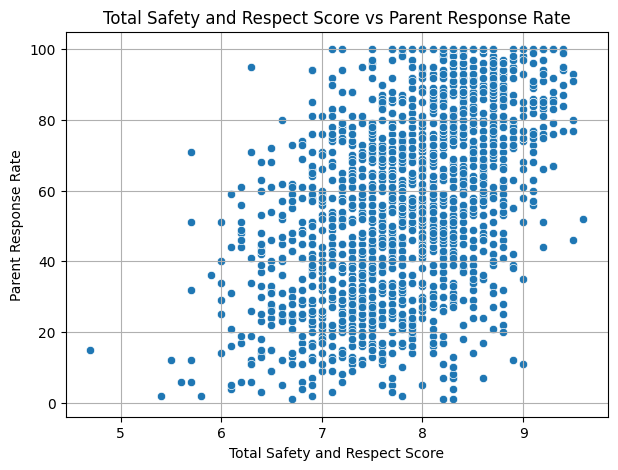

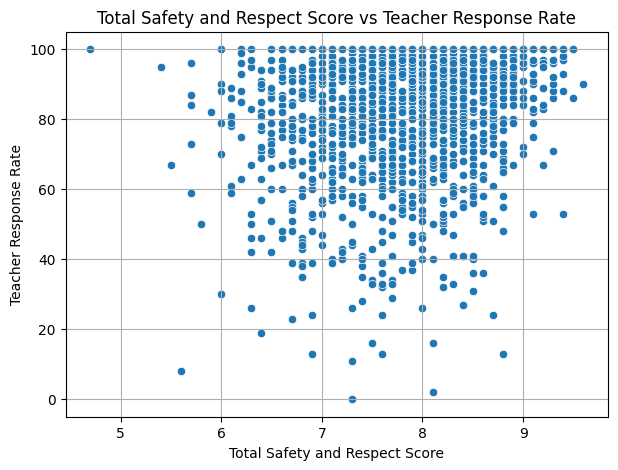

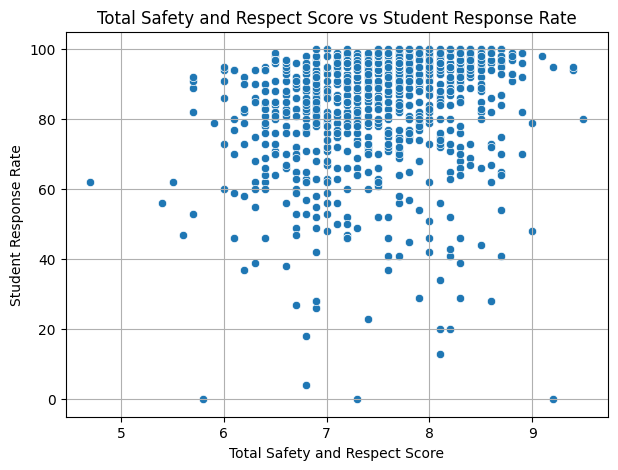

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

response_cols = ['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']


for col in response_cols:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df, x='Total Safety and Respect Score', y=col)
    plt.title(f'Total Safety and Respect Score vs {col}')
    plt.xlabel('Total Safety and Respect Score')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()



In [24]:
# تحليل توزيع نوع المدرسة في المدارس ذات القيم المنخفضة
print("توزيع نوع المدرسة في المدارس ذات القيم المنخفضة:")
print(low_outliers['School Type'].value_counts())
print("\n")

# فحص نسب الاستجابة في المدارس ذات القيم المنخفضة
print("إحصائيات نسب الاستجابة (والدين، معلمين، طلاب) للمدارس ذات القيم المنخفضة:")
print(low_outliers[['Parent Response Rate', 'Teacher Response Rate', 'Student Response Rate']].describe())
print("\n")

# إحصائيات المؤشرات الأخرى (اختياري)
print("إحصائيات المؤشرات الأساسية للمدارس ذات القيم المنخفضة:")
print(low_outliers[['Total Communication Score', 'Total Engagement Score', 'Total Academic Expectations Score']].describe())


توزيع نوع المدرسة في المدارس ذات القيم المنخفضة:
School Type
High School                 71
Middle School               58
Elementary School           24
Middle/High School          19
Elementary/Middle School    15
Transfer High School         3
Early Childhood School       3
Name: count, dtype: int64


إحصائيات نسب الاستجابة (والدين، معلمين، طلاب) للمدارس ذات القيم المنخفضة:
       Parent Response Rate Teacher Response Rate Student Response Rate
count                   193                   193                   167
unique                   72                    65                    55
top                     25%                   94%                   91%
freq                      9                    11                     9


إحصائيات المؤشرات الأساسية للمدارس ذات القيم المنخفضة:
       Total Communication Score  Total Engagement Score  \
count                 193.000000              193.000000   
mean                    6.207254                6.518135   
std                    

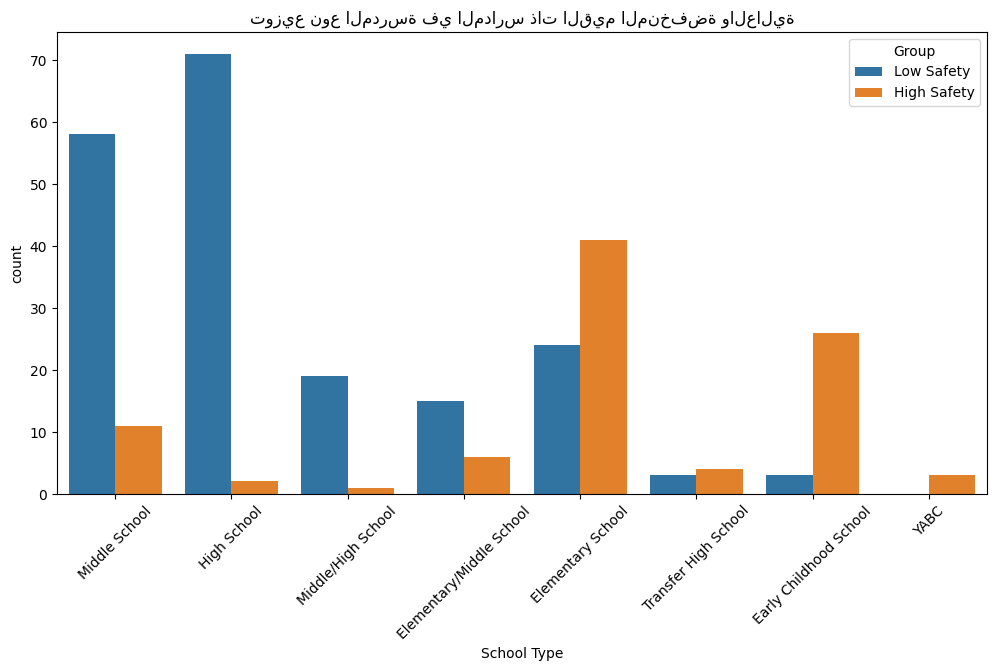

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))

# دمج المجموعتين مع إضافة عمود للتصنيف
low_outliers['Group'] = 'Low Safety'
high_outliers['Group'] = 'High Safety'
combined = pd.concat([low_outliers, high_outliers])

sns.countplot(data=combined, x='School Type', hue='Group')
plt.title('توزيع نوع المدرسة في المدارس ذات القيم المنخفضة والعالية')
plt.xticks(rotation=45)
plt.show()
